## Explanatory Notebook for random data generation used for the training of a CNN for digit recognition in a sudoku grid:

In [1]:
from __future__ import print_function
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageFont, ImageDraw

## Create a cell with a digit in the center:

First we create a plain image with random light background
the insert a random digit in it and then we create some the lines around the cell.


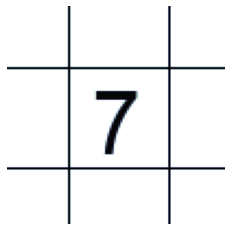

In [5]:

strip_width, strip_height = 100, 100

background =Image.new('RGB', (strip_width, strip_height), color = (np.random.randint(80, 255), np.random.randint(80, 255), np.random.randint(80, 255)))

#font1 = ImageFont.truetype('/Library/Fonts/Arial.ttf', 40)
y=np.random.randint(0, 9+1) #Digit to write
y=7 # For this exemple we take 7

if y>0:
    text=str(y)
    font = ImageFont.truetype('/Library/Fonts/Arial.ttf', 40)
    draw = ImageDraw.Draw(background)
    
    text_width, text_height = draw.textsize(text, font)
    position = ((strip_width-text_width)/2,(strip_height-text_height)/2)
    color=(np.random.randint(0, 10), np.random.randint(0, 10), np.random.randint(0, 10))
    draw.text(position, text, color, font=font)
    #draw.text(position, str(y), color, font=font)
    
img=np.array(background)
img=0.2989*img[:, :, 0]+0.5870*img[:, :, 1]+0.1140*img[:, :, 2]
img[:, [28, 74]]=1
img[[28, 74], :]=1

plt.imshow(img, cmap='bone')
plt.axis('off')
plt.show()



## Next we want to select random area of same size around the digit to account for imprecise cell separation in the algorithm

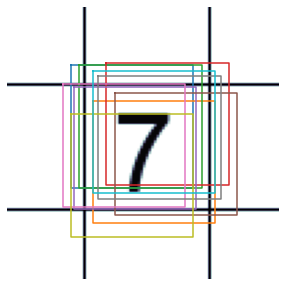

In [6]:
cell_size=45 #size of the cell we want to select
plt.figure(figsize=(5,5)) 
for i in range(0, 10):
    x=np.random.randint(19, 40)
    y=np.random.randint(19, 40)
    x2=[x, x+cell_size, x+cell_size, x, x]
    y2=[y, y, y+cell_size, y+cell_size, y]
    plt.plot(x2, y2)

plt.imshow(img, cmap='bone')
plt.savefig('cell_selection.png')
plt.axis('off')
plt.show()

## Add noise and elastic deformation:

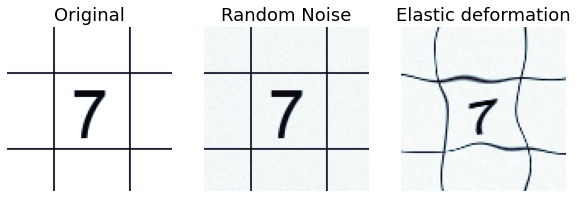

In [7]:
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter

def add_noise(img):
    row, col=np.shape(img)
    mean = 10
    var = 0.5
    sigma = var**0.1
    gauss = np.array((row, col))
    gauss = np.random.normal(mean,sigma,(row,col))
    gauss = gauss.reshape(row,col)
    noisy = img + gauss
    return noisy.astype('uint8')

def elastic_transform(image, alpha, sigma, random_state=None):
    if random_state is None:
        random_state = np.random.RandomState(None)

    shape = image.shape
    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dz = np.zeros_like(dx)

    x, y = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]))
    indices = np.reshape(y+dy, (-1, 1)), np.reshape(x+dx, (-1, 1))
    distored_image = map_coordinates(image, indices, order=1, mode='reflect')
    return distored_image.reshape(image.shape)


img2=add_noise(img)
img3=elastic_transform(img2, 200, 10)

f = plt.figure(figsize=(10,20))
f.add_subplot(1,3, 1)
plt.imshow(img, cmap='bone')
plt.title('Original',fontsize=18)
plt.axis('off')
f.add_subplot(1,3, 2)
plt.imshow(img2, cmap='bone')
plt.title('Random Noise',fontsize=18)
plt.axis('off')

f.add_subplot(1,3, 3)
plt.imshow(img3, cmap='bone')
plt.title('Elastic deformation',fontsize=18)
#plt.show(block=True)
plt.axis('off')
plt.savefig('noisy_images.png', bbox_inches='tight')
plt.show()

## All script:

In [8]:

def elastic_transform(image, alpha, sigma, random_state=None):
    if random_state is None:
        random_state = np.random.RandomState(None)

    shape = image.shape
    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dz = np.zeros_like(dx)

    x, y = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]))
    indices = np.reshape(y+dy, (-1, 1)), np.reshape(x+dx, (-1, 1))
    distored_image = map_coordinates(image, indices, order=1, mode='reflect')
    return distored_image.reshape(image.shape)

    
def add_noise(img):
    row, col=np.shape(img)
    mean = 0
    var = 2
    sigma = var**0.3
    gauss = np.array((row, col))
    gauss = np.random.normal(mean,sigma,(row,col))
    gauss = gauss.reshape(row,col)
    noisy = img + gauss
    return noisy.astype('uint8')

def get_image_part(img, cell_size):
    x=np.random.randint(19, 40)
    y=np.random.randint(19, 40)
    img=img[x:x+cell_size, y:y+cell_size]
    return img


def create_data(length, list_of_font, threshold=True, consider_empty=True):
    cell_size=45
    y_label=np.zeros(length, dtype=int)
    
    x_img=np.zeros((length, cell_size, cell_size), dtype=float)
    for i in range(0, length):
        
        if consider_empty:
            y=np.random.randint(0, 9+1)
        
        else:
            y=np.random.randint(1, 9+1)
        
        y_label[i]=y
        
        strip_width, strip_height = 100, 100

        background =Image.new('RGB', (strip_width, strip_height), color = (np.random.randint(80, 255), np.random.randint(80, 255), np.random.randint(80, 255)))
        font1=list_of_font[np.random.randint(0, len(list_of_font))]
        font = ImageFont.truetype(font1, 40)
        draw = ImageDraw.Draw(background)
        text_width, text_height = draw.textsize(text, font)
        position = ((strip_width-text_width)/2,(strip_height-text_height)/2)
        color=(np.random.randint(0, 10), np.random.randint(0, 10), np.random.randint(0, 10))
        
        if y>0:
            draw.text(position, str(y), color, font=font)
           
        img=np.array(background)
        img=0.2989*img[:, :, 0]+0.5870*img[:, :, 1]+0.1140*img[:, :, 2]
        bar_w=np.random.randint(1, 4)
        img[:, 28:28+bar_w]=1
        bar_w=np.random.randint(1, 4)
        img[:, 74:74+bar_w]=1
        bar_w=np.random.randint(1, 4)
        img[28:28+bar_w, :]=1
        bar_w=np.random.randint(1, 4)
        img[74:74+bar_w, :]=1
        img=get_image_part(img, cell_size)
        
        img=add_noise(img)
        img = cv2.GaussianBlur(img, (3,3), 0)
        img=elastic_transform(img, np.random.randint(0, 100), np.random.randint(5, 10), random_state=None)
        
        x_img[i, :, :]=img
        
    return x_img, y_label
        
list_of_font=['/Library/Fonts/Arial.ttf', '/Library/Fonts/Courier New.ttf', '/Library/Fonts/Times New Roman.ttf']



n=160000 #Number of image to generate
xx, yy=create_data(n, list_of_font, False)

In [9]:
print(np.shape(xx))

(160000, 45, 45)


## Plot results of data Generation:

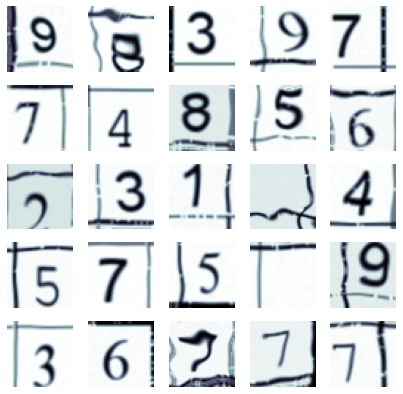

In [10]:
f = plt.figure(figsize=(7,7))

num_img=25
n, m=int(np.sqrt(num_img)), int(np.sqrt(num_img))


for i in range(1, num_img+1):
    f.add_subplot(n,m, i)
    plt.imshow(xx[i, :, :], cmap='bone')
    plt.axis('off')

plt.savefig('digits.png' , bbox_inches='tight')
plt.show()

## Train the Network:

Model building and training:

In [13]:
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

x_train, x_test, y_train, y_test = train_test_split(xx, yy, test_size=0.2)

#cell_size=45
batch_size = 128
num_classes = len(np.unique(yy))
epochs = 14

# input image dimensions
img_rows, img_cols = cell_size, cell_size

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (4, 4), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=opt,
              metrics=['accuracy'])

history2=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (128000, 45, 45, 1)
128000 train samples
32000 test samples
Train on 128000 samples, validate on 32000 samples
Epoch 1/14
128000/128000 [==============================] - 379s 3ms/step - loss: 1.4000 - accuracy: 0.4949 - val_loss: 0.5114 - val_accuracy: 0.8777
Epoch 2/14
128000/128000 [==============================] - 400s 3ms/step - loss: 0.4056 - accuracy: 0.8749 - val_loss: 0.1474 - val_accuracy: 0.9601
Epoch 3/14
128000/128000 [==============================] - 384s 3ms/step - loss: 0.2069 - accuracy: 0.9400 - val_loss: 0.1009 - val_accuracy: 0.9710
Epoch 4/14
128000/128000 [==============================] - 385s 3ms/step - loss: 0.1438 - accuracy: 0.9588 - val_loss: 0.0661 - val_accuracy: 0.9818
Epoch 5/14
128000/128000 [==============================] - 384s 3ms/step - loss: 0.1104 - accuracy: 0.9682 - val_loss: 0.0523 - val_accuracy: 0.9844
Epoch 6/14
128000/128000 [==============================] - 384s 3ms/step - loss: 0.0910 - accuracy: 0.9735 - val_loss: 0.04

## Plot the training and testing loss and accuracy:

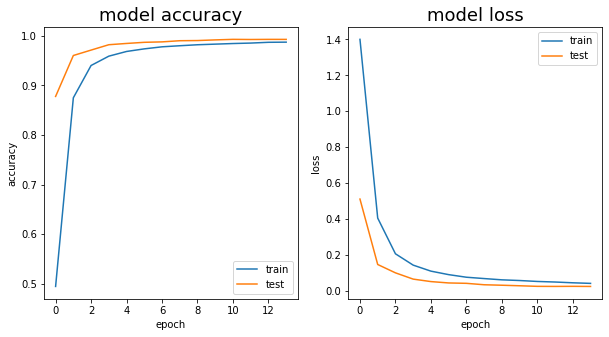

In [18]:

f = plt.figure(figsize=(10,5))
f.add_subplot(1,2, 1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy', fontsize=18)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

f.add_subplot(1,2, 2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss',fontsize=18)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('plots/training_stats.png' , bbox_inches='tight')

plt.show()



In [15]:
#Save model for further use:
model.save("models/digit_recognition_model3.h5")

## Validation set from real sudoku grids:

<br>
<br>

Here we try to access how robust our model is in recognising cell images extracted from several real sudoku  grids. The sudoku images we used are available in the  sample_img  folder and the cell areas have been extracted following the process shown on the sgrid_detection.ipynb Notebook.

<br>


In [16]:
#Load data from real sudoku grids:

yy_lab=np.load('data_npy/total_val_label.npy')
yy_lab=np.array(yy_lab)
raw_img=np.load('data_npy/total_val_im.npy')
xx_1=raw_img

In [17]:
y_x = keras.utils.to_categorical(yy_lab, num_classes)
#Returns the loss value & metrics values for the model in test mode.
lo, acc=model.evaluate(xx_1, y_x, batch_size=81)
print('accuracy: ', round(acc, 4))

324/324 [==============================] - 0s 570us/step
accuracy:  1.0


The model is working and achieves a 100% accuracy on images from our real-test grids (images it has not been trained on)

In [24]:
pred=model.predict(xx_1)
y_pred=pred.argmax(1)
print(y_pred)

[0 7 0 0 8 4 0 3 0 0 0 0 7 0 3 5 0 0 0 6 0 0 0 0 0 0 2 6 0 0 0 0 0 2 0 3 0
 0 0 2 0 1 0 0 0 4 0 5 0 0 0 0 0 1 7 0 0 0 0 0 0 2 0 0 0 8 9 0 7 0 0 0 0 9
 0 3 5 0 0 8 0 0 1 0 0 0 0 0 6 0 7 9 0 8 0 0 0 3 5 0 0 5 0 3 7 8 0 0 0 0 7
 3 0 8 0 1 0 0 0 6 0 0 0 5 0 0 0 8 0 6 0 5 3 0 0 0 0 8 9 4 0 6 0 0 1 4 0 0
 0 3 0 8 9 0 6 0 0 0 0 0 5 0 8 0 0 0 0 0 3 0 0 0 0 2 0 5 7 0 0 0 7 0 0 3 0
 0 5 0 0 3 0 9 1 0 5 0 0 0 0 2 0 0 0 0 0 8 0 0 0 0 4 0 3 9 0 1 0 0 7 0 0 8
 0 0 9 0 0 0 2 4 0 6 0 0 0 0 6 0 0 0 0 0 5 0 0 0 0 2 1 0 3 4 6 0 0 0 0 3 2
 0 0 0 0 0 5 0 0 0 6 0 4 0 9 0 5 0 0 0 0 0 2 0 0 0 0 0 4 0 0 0 0 0 7 0 9 0
 2 0 9 0 0 0 6 0 0 0 0 0 1 2 0 0 0 0 6 3 7 0 4 8 0 0 0 0]


## Confusion Matrix:

<br>
<br>

In [26]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(yy_lab, y_pred)


In [36]:
print('Confusion Matrix:')
print(matrix)


Confusion Matrix:
[[214   0   0   0   0   0   0   0   0   0]
 [  0   9   0   0   0   0   0   0   0   0]
 [  0   0  12   0   0   0   0   0   0   0]
 [  0   0   0  16   0   0   0   0   0   0]
 [  0   0   0   0  10   0   0   0   0   0]
 [  0   0   0   0   0  14   0   0   0   0]
 [  0   0   0   0   0   0  13   0   0   0]
 [  0   0   0   0   0   0   0  12   0   0]
 [  0   0   0   0   0   0   0   0  13   0]
 [  0   0   0   0   0   0   0   0   0  11]]


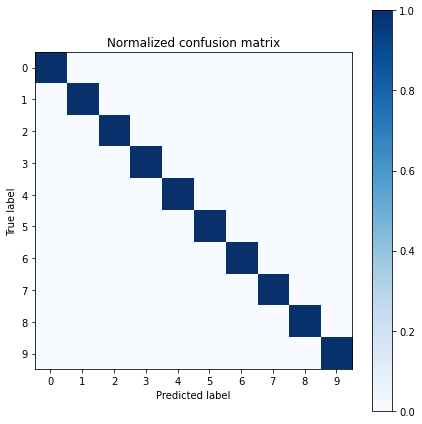

In [37]:
#Normalized Confusion Matrix:

cm_normalized = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    f = plt.figure(figsize=(6,6))
    labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('plots/conf_matrix.png' , bbox_inches='tight')
    
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')